In [ ]:
#columnas_seleccionadas = [
   # 'action_taken2', 'purchaser_type', 'preapproval',
    #'loan_type', 'loan_purpose', 'lien_status','reverse_mortgage','open_end_line_of_credit', 'business_or_commercial_purpose' 'loan_amount', 'hoepa_status',
    #'occupancy_type', 'applicant_credit_score_type','combined_loan_to_value_ratio', 'property_value ','occupancy_type ','manufactured_home_secured_proper',
    #'applicant_age', 'hoepa_status ', 'loan_term ','manufactured_home_land_property', 'multifamily_affordable_units','income ','applicant_credit_score_type'
    #'conforming_loan_limit', 'derived_loan_product_type', 'applicant_sex '

# CARGA INFORMACION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Librerias
import os
from pandas import read_csv
%matplotlib inline

import numpy as np
import pandas as pd
#graficas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

# Reemplaza la ruta con la ubicación de tu archivo Stata (.dta)
file_path = "/content/drive/MyDrive/Proyecto Grado/HDMA/Version Final/LAR_18_19_Muestra.dta"

# Cargar el archivo Stata en un DataFrame
data = pd.read_stata(file_path)


In [ ]:
# Información sobre tipos de datos y valores nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   activity_year                     1000000 non-null  int16   
 1   lei                               1000000 non-null  object  
 2   state_code                        1000000 non-null  object  
 3   county_code                       1000000 non-null  object  
 4   action_taken                      1000000 non-null  category
 5   purchaser_type                    1000000 non-null  category
 6   preapproval                       1000000 non-null  int8    
 7   loan_type                         1000000 non-null  category
 8   loan_purpose                      1000000 non-null  category
 9   lien_status                       1000000 non-null  int8    
 10  reverse_mortgage                  973978 non-null   float64 
 11  open_end_line_of_credit  

In [ ]:
categorias_columna1 = data['applicant_sex'].unique()
categorias_columna2 = data['applicant_race_1'].unique()
categorias_columna3 = data['applicant_ethnicity_1'].unique()
categorias_columna4 = data['applicant_age_above_62'].unique()

print("Categorías únicas en applicant_sex :", categorias_columna1)
print("Categorías únicas en applicant_race_1:", categorias_columna2)
print("Categorías únicas en applicant_ethnicity_1:", categorias_columna3)
print("Categorías únicas en applicant_age_above_62:", categorias_columna4)


Categorías únicas en applicant_sex : ['mujer', 'hombre', 'selecciono ambas opciones']
Categories (3, object): ['hombre' < 'mujer' < 'selecciono ambas opciones']
Categorías únicas en applicant_race_1: ['negro/afroamericano', 'blanco', 'sin info', 'asiatico', 'nativo americano/alaska', ..., 'koreano', 'guameno o chamorro', 'japones', 'samoan', 'hawaiano']
Length: 18
Categories (18, object): ['nativo americano/alaska' < 'asiatico' < 'negro/afroamericano' <
                          'hawaiano/isleno del pacifico' ... 'hawaiano' < 'guameno o chamorro' < 'samoan' <
                          'otro isleno del pacifico']
Categorías únicas en applicant_ethnicity_1: ['no hispano/latino', 'hispano/latino', 'sin info', 'mexicano', 'otro hispano/latino', 'cubano', 'puertorriqueno', NaN, 'no aplica']
Categories (8, object): ['hispano/latino' < 'no hispano/latino' < 'sin info' < 'no aplica' < 'mexicano' <
                         'puertorriqueno' < 'cubano' < 'otro hispano/latino']
Categorías únicas e

In [ ]:
# Mostrar los datos originales de una columna específica
columna_original = data['action_taken2']
print(columna_original)


0                negado
1              aprobado
2              aprobado
3              aprobado
4         no finalizado
              ...      
999995         aprobado
999996         aprobado
999997         aprobado
999998         aprobado
999999         aprobado
Name: action_taken2, Length: 1000000, dtype: category
Categories (3, object): ['aprobado' < 'negado' < 'no finalizado']


# PREPARACION DATA SET PARA FASE MODELOS

Se abordan los siguientes pasos:

Preparar el conjunto de datos
Dividir en el entrenamiento y la prueba
Transformar/Codificar las etiquetas de las variables
PExplorar diferents modelos de clasificacion
Compara el desempeño de todos los modelos.
Seleccionar un  modelo ganador y ajuste los hiperparámetros para obtener una mayor precisión.
Evaluación detallada de resultado con una matriz de confusión y diferentes medidas.
Características más importantes para predecir la calificación.

In [ ]:
# Eliminación de variables que tengan valores nulos
#df1 = data.dropna(axis=1)

# Eliminación de tres columnas adicionales específicas
columnas_adicionales = ['lei', 'state_code', 'county_code', 'activity_year']
#df1 = df1.drop(columnas_adicionales, axis=1)


In [ ]:
# Guardar la correspondencia de clases para 'action_taken2'
correspondencia_original_action_taken2 = dict(zip(data['action_taken2'].unique(), data['action_taken2'].unique()))
print("Correspondencia de clases original para 'action_taken2':")
print(correspondencia_original_action_taken2)


Correspondencia de clases original para 'action_taken2':
{'negado': 'negado', 'aprobado': 'aprobado', 'no finalizado': 'no finalizado'}


In [ ]:
# Convertir valores de action_taken2 a minúsculas
data['action_taken2'] = data['action_taken2'].str.lower()

# Mapeo de los valores de action_taken2 a los valores correspondientes en action_taken3
mapping = {
    'aprobado': 'Otorgado',
    'negado': 'No Otorgado',
    'no finalizado': 'No Otorgado'
}

# Crear la nueva columna action_taken3 basada en los valores de action_taken2
data['action_taken3'] = data['action_taken2'].replace(mapping)

In [ ]:
# Mostrar los datos originales de una columna específica
columna_original = data['action_taken3']
print(columna_original)

0         No Otorgado
1            Otorgado
2            Otorgado
3            Otorgado
4         No Otorgado
             ...     
999995       Otorgado
999996       Otorgado
999997       Otorgado
999998       Otorgado
999999       Otorgado
Name: action_taken3, Length: 1000000, dtype: object


In [ ]:
# Convertir valores a cadenas y guardar los originales en nuevas columnas
columns_to_check = ['protegido_edad', 'no_protegido_edad', 'protegido_mujer', 'no_protegido_hombre', 'protegido_raza', 'no_protegido_raza']

for column in columns_to_check:
    # Crear una nueva columna con el nombre original + '_antes_conversion'
    data[column + '_antes_conversion'] = data[column]
    # Convertir los valores a numéricos
    data[column] = pd.to_numeric(data[column], errors='coerce')

import numpy as np

# Crear la nueva columna 'poblacion_protegida' basada en las condiciones
data['poblacion_protegida'] = np.where(
    (data['protegido_edad'] == 1) |
    (data['protegido_mujer'] == 1) |
    (data['protegido_raza'] == 1),
    1,  # Si alguna de las condiciones se cumple, asigna 1
    np.where(
        (data['no_protegido_edad'] == 1) |
        (data['no_protegido_hombre'] == 1) |
        (data['no_protegido_raza'] == 1),
        0,  # Si alguna de las condiciones se cumple, asigna 0
        np.nan  # Si ninguna de las condiciones se cumple, asigna NaN por defecto
    )
)

# Crear una nueva columna 'poblacion_protegida_nueva' basada en las condiciones
data['poblacion_protegida_nueva'] = np.where(
    (data['protegido_edad'] == 1) |
    (data['protegido_mujer'] == 1) |
    (data['protegido_raza'] == 1),
    1,  # Si alguna de las condiciones se cumple, asigna 1
    np.where(
        (data['no_protegido_edad'] == 1) |
        (data['no_protegido_hombre'] == 1) |
        (data['no_protegido_raza'] == 1),
        0,  # Si alguna de las condiciones se cumple, asigna 0
        np.nan  # Si ninguna de las condiciones se cumple, asigna NaN por defecto
    )
)


In [ ]:
# Información sobre tipos de datos y valores nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 70 columns):
 #   Column                                Non-Null Count    Dtype   
---  ------                                --------------    -----   
 0   activity_year                         1000000 non-null  int16   
 1   lei                                   1000000 non-null  object  
 2   state_code                            1000000 non-null  object  
 3   county_code                           1000000 non-null  object  
 4   action_taken                          1000000 non-null  category
 5   purchaser_type                        1000000 non-null  category
 6   preapproval                           1000000 non-null  int8    
 7   loan_type                             1000000 non-null  category
 8   loan_purpose                          1000000 non-null  category
 9   lien_status                           1000000 non-null  int8    
 10  reverse_mortgage                      97397

# CREACION DE DATA SET PARA MODELOS

In [ ]:
# Crear un nuevo DataFrame con solo las columnas seleccionadas
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Lista de columnas seleccionadas
columnas_seleccionadas = ['action_taken3', 'income', 'applicant_sex', 'loan_amount', 'loan_purpose', 'loan_type', 'debt_to_income_ratio','combined_loan_to_value_ratio', 'applicant_age']
df = data[columnas_seleccionadas].copy()


# Usar LabelEncoder para transformar la columna 'action_taken2'

label_encoder_action_taken3 = LabelEncoder()
df['action_taken3'] = label_encoder_action_taken3.fit_transform(df['action_taken3'])

# Convertir variables categóricas a numéricas y mapear clases de 'action_taken2' a números
label_encoder = LabelEncoder()
#df['purchaser_type'] = label_encoder.fit_transform(df['purchaser_type'])
#df['preapproval'] = label_encoder.fit_transform(df['preapproval'])
df['loan_type'] = label_encoder.fit_transform(df['loan_type'])
df['loan_purpose'] = label_encoder.fit_transform(df['loan_purpose'])
#df['lien_status'] = label_encoder.fit_transform(df['lien_status'])
#f['hoepa_status'] = label_encoder.fit_transform(df['hoepa_status'])
#df['occupancy_type'] = label_encoder.fit_transform(df['occupancy_type'])
#df['applicant_credit_score_type'] = label_encoder.fit_transform(df['applicant_credit_score_type'])
#df['manufactured_home_land_property_'] = label_encoder.fit_transform(df['manufactured_home_land_property_'])
df['applicant_sex'] = label_encoder.fit_transform(df['applicant_sex'])
#df['conforming_loan_limit'] = label_encoder.fit_transform(df['conforming_loan_limit'])
#df['derived_loan_product_type'] = label_encoder.fit_transform(df['derived_loan_product_type'])
#df['applicant_race_1'] = label_encoder.fit_transform(df['applicant_race_1'])
#df['applicant_ethnicity_1'] = label_encoder.fit_transform(df['applicant_ethnicity_1'])
df['debt_to_income_ratio'] = label_encoder.fit_transform(df['debt_to_income_ratio'])
df['applicant_age'] = label_encoder.fit_transform(df['applicant_age'])

# Definir la función para mapear 'action_taken2' a 'aprobado'
def map_approval(action_taken3):
    # Define aquí tus criterios para determinar si un préstamo fue aprobado o no
    # Por ejemplo, si action_taken es 1, considera que el préstamo fue aprobado (1); de lo contrario, no aprobado (0)
    if action_taken3 == 1:
        return 1
    else:
        return 0

# Aplicar la función para crear la columna 'aprobado'
#df['otorgado'] = df['action_taken3'].apply(map_approval)

# Dividir el conjunto de datos en características (X) y etiquetas (y)
#X = df.drop(['otorgado', 'action_taken3'], axis=1)  # Excluir 'aprobado' y 'action_taken2' de las características
#y = df['otorgado']  # Usar 'aprobado' como variable de respuesta

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(['action_taken3'], axis=1)  # Excluir 'action_taken3' de las características
y = df['action_taken3']  # Usar 'action_taken3' como variable de respuesta


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resto del código...
# Definir las transformaciones para las variables numéricas y categóricas
numeric_features = ['loan_amount',
                    'income','combined_loan_to_value_ratio']
categorical_features = ['applicant_sex','loan_purpose', 'loan_type','debt_to_income_ratio','applicant_age']

# Crear el transformador para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes con la media
    ('scaler', StandardScaler())  # Estandarización de las variables
])

# Crear el transformador para datos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes con la moda
    ('encoder', OneHotEncoder(drop='first'))  # Codificación one-hot
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# Información sobre tipos de datos y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   action_taken3                 1000000 non-null  int64  
 1   income                        957551 non-null   float64
 2   applicant_sex                 1000000 non-null  int64  
 3   loan_amount                   1000000 non-null  int32  
 4   loan_purpose                  1000000 non-null  int64  
 5   loan_type                     1000000 non-null  int64  
 6   debt_to_income_ratio          1000000 non-null  int64  
 7   combined_loan_to_value_ratio  701585 non-null   float64
 8   applicant_age                 1000000 non-null  int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 64.8 MB
None


# ENTRENAMIENTO MODELOS

# lGBM Model

In [ ]:

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instanciar y entrenar el modelo LGBMClassifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)

# Imprimir métricas de rendimiento para LGBMClassifier
print(f'LGBMClassifier Accuracy: {accuracy_lgbm}')
print(f'LGBMClassifier Confusion Matrix:\n{conf_matrix_lgbm}')
print(f'LGBMClassifier Classification Report:\n{classification_rep_lgbm}')


[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.654212 -> initscore=0.637608
[LightGBM] [Info] Start training from score 0.637608
LGBMClassifier Accuracy: 0.807315
LGBMClassifier Confusion Matrix:
[[ 47588  21468]
 [ 17069 113875]]
LGBMClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71     69056
           1       0.84      0.87      0.86    130944

    accuracy                           0.81    200000
   macro avg       0.79      0.78      0.78    200000
weighted avg       0.80      0.

Precisión, recall y F1 GTB Mejor modelo

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lgbm, target_names=['No Aprobado', 'Aprobado']))


              precision    recall  f1-score   support

 No Aprobado       0.74      0.69      0.71     69056
    Aprobado       0.84      0.87      0.86    130944

    accuracy                           0.81    200000
   macro avg       0.79      0.78      0.78    200000
weighted avg       0.80      0.81      0.81    200000



# EVALUACION DESEMPEÑO EN GRUPOS DE INTERÉS

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Codificar la variable objetivo 'action_taken2'
label_encoder_action_taken3 = LabelEncoder()
data['action_taken3_encoded'] = label_encoder_action_taken3.fit_transform(data['action_taken3'])

# Función para filtrar los datos según el grupo de interés
def filtrar_datos_para_grupo(grupo, data):
    if grupo == 'protegido_edad':
        return data[data['applicant_age_above_62'] == 1]
    elif grupo == 'no_protegido_edad':
        return data[data['applicant_age_above_62'] == 0]
    elif grupo == 'protegido_sexo':
        return data[data['applicant_sex'] != 'hombre']
    elif grupo == 'no_protegido_sexo':
        return data[data['applicant_sex'] == 'hombre']
    elif grupo == 'protegido_raza':
        return data[data['applicant_race_1'] != 'blanco']
    elif grupo == 'no_protegido_raza':
        return data[data['applicant_race_1'] == 'blanco']
    else:
        raise ValueError("Grupo de interés no válido")

# Definir los grupos de interés
grupos_interes = ['protegido_edad', 'no_protegido_edad', 'protegido_sexo', 'no_protegido_sexo', 'protegido_raza', 'no_protegido_raza']

# Definir las características numéricas y categóricas
numeric_features = ['loan_amount',
                    'income','combined_loan_to_value_ratio']
categorical_features = ['applicant_race_1', 'applicant_sex','loan_purpose', 'loan_type','applicant_age','debt_to_income_ratio']


# Crear transformadores para datos numéricos y categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Entrenar el modelo XGBoost
lgbm_model1 = XGBClassifier(objective='multi:softmax', num_class=3, random_state=0)

# Ciclo para calcular y mostrar las métricas de desempeño para cada grupo
for grupo in grupos_interes:
    # Filtrar los datos para el grupo actual
    df_grupo = filtrar_datos_para_grupo(grupo, data)

    # Separar características y etiquetas
    X_grupo = df_grupo.drop(['action_taken3', 'action_taken3_encoded'], axis=1)
    y_grupo = df_grupo['action_taken3_encoded']

    # Preprocesar datos
    X_grupo_preprocessed = preprocessor.fit_transform(X_grupo)

    # Entrenar el modelo en el grupo actual
    lgbm_model1.fit(X_grupo_preprocessed, y_grupo)

    # Predecir utilizando el modelo
    y_pred_grupo = lgbm_model1.predict(X_grupo_preprocessed)

    # Calcular y mostrar las métricas de desempeño
    accuracy = accuracy_score(y_grupo, y_pred_grupo)
    precision = precision_score(y_grupo, y_pred_grupo, average='weighted')
    recall = recall_score(y_grupo, y_pred_grupo, average='weighted')
    f1 = f1_score(y_grupo, y_pred_grupo, average='weighted')

    print(f'Métricas de desempeño para el grupo {grupo}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print()


Métricas de desempeño para el grupo protegido_edad:
Accuracy: 0.8090
Precision: 0.8080
Recall: 0.8090
F1 Score: 0.8076

Métricas de desempeño para el grupo no_protegido_edad:
Accuracy: 0.8131
Precision: 0.8098
Recall: 0.8131
F1 Score: 0.8105

Métricas de desempeño para el grupo protegido_sexo:
Accuracy: 0.8135
Precision: 0.8113
Recall: 0.8135
F1 Score: 0.8116

Métricas de desempeño para el grupo no_protegido_sexo:
Accuracy: 0.8122
Precision: 0.8089
Recall: 0.8122
F1 Score: 0.8094

Métricas de desempeño para el grupo protegido_raza:
Accuracy: 0.8118
Precision: 0.8112
Recall: 0.8118
F1 Score: 0.8111

Métricas de desempeño para el grupo no_protegido_raza:
Accuracy: 0.8133
Precision: 0.8094
Recall: 0.8133
F1 Score: 0.8102



In [ ]:
# Contar el número de observaciones en cada grupo filtrado
for grupo in grupos_interes:
    df_grupo = filtrar_datos_para_grupo(grupo, data)
    print(f"Grupo: {grupo}")
    print(f"Número de observaciones: {len(df_grupo)}")  # Contar el número de filas del DataFrame filtrado
    print()


Grupo: protegido_edad
Número de observaciones: 186660

Grupo: no_protegido_edad
Número de observaciones: 805782

Grupo: protegido_sexo
Número de observaciones: 331899

Grupo: no_protegido_sexo
Número de observaciones: 668101

Grupo: protegido_raza
Número de observaciones: 230854

Grupo: no_protegido_raza
Número de observaciones: 769146



# METRICAS DE FAIRNESS

Statistical Parity Difference

Corresponde a la diferencia entre la probabilidad de pertenecer a la clase positiva dado que se pertenece a la clase protegida y la posibilidad de pertenecer a la clase positiva dado que se pertenece a la clase no protegida

Disparate Impact

# METRICAS DE EQUIDAD POR GENERO

In [ ]:
value_counts = data['applicant_sex'].value_counts()
print(value_counts)


applicant_sex
hombre                       668101
mujer                        330947
selecciono ambas opciones       952
Name: count, dtype: int64


In [ ]:
value_counts = df['applicant_sex'].value_counts()
print(value_counts)

applicant_sex
0    668101
1    330947
2       952
Name: count, dtype: int64


In [ ]:
value_counts = data['applicant_age'].value_counts()
print(value_counts)

applicant_age
35-44       233298
45-54       218875
25-34       193393
55-64       175896
65-74       104118
>74          37531
<25          29331
sin info      7558
Name: count, dtype: int64


In [ ]:
value_counts = df['applicant_age'].value_counts()
print(value_counts)

applicant_age
1    233298
2    218875
0    193393
3    175896
4    104118
6     37531
5     29331
7      7558
Name: count, dtype: int64


In [ ]:
# Información sobre tipos de datos y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   action_taken3                 1000000 non-null  int64  
 1   income                        957551 non-null   float64
 2   applicant_sex                 1000000 non-null  int64  
 3   loan_amount                   1000000 non-null  int32  
 4   loan_purpose                  1000000 non-null  int64  
 5   loan_type                     1000000 non-null  int64  
 6   debt_to_income_ratio          1000000 non-null  int64  
 7   combined_loan_to_value_ratio  701585 non-null   float64
 8   applicant_age                 1000000 non-null  int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 64.8 MB
None


In [ ]:
import pandas as pd

# Hacer una copia del DataFrame df y llamarlo df1
df1 = df.copy()

# Información sobre tipos de datos y valores nulos en df1
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   action_taken3                 1000000 non-null  int64  
 1   income                        957551 non-null   float64
 2   applicant_sex                 1000000 non-null  int64  
 3   loan_amount                   1000000 non-null  int32  
 4   loan_purpose                  1000000 non-null  int64  
 5   loan_type                     1000000 non-null  int64  
 6   debt_to_income_ratio          1000000 non-null  int64  
 7   combined_loan_to_value_ratio  701585 non-null   float64
 8   applicant_age                 1000000 non-null  int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 64.8 MB
None


In [ ]:
predicciones = lgbm_model.predict(df.drop('action_taken3', axis=1))


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['action_taken3'], predicciones))


              precision    recall  f1-score   support

           0       0.73      0.69      0.71    345686
           1       0.84      0.87      0.85    654314

    accuracy                           0.81   1000000
   macro avg       0.79      0.78      0.78   1000000
weighted avg       0.80      0.81      0.81   1000000



COMPARACION ACCURARY -PRECISION -RECALL calculadas para los grupos masculino y femenino

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def calcular_metricas_por_grupo(y_true, y_pred, grupo):
    if grupo == 0:  # Masculino
        indices_grupo = np.where(df['applicant_sex'] == 0)[0]
    elif grupo == 1:  # Femenino
        indices_grupo = np.where(df['applicant_sex'].isin([1, 2]))[0]
    else:
        raise ValueError("El valor de grupo debe ser 0 (masculino) o 1 (femenino)")

    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]

    precision = precision_score(y_true_grupo, y_pred_grupo)
    recall = recall_score(y_true_grupo, y_pred_grupo)
    f1 = f1_score(y_true_grupo, y_pred_grupo)

    return precision, recall, f1

precision_masculino, recall_masculino, f1_masculino = calcular_metricas_por_grupo(df['action_taken3'], predicciones, 0)
precision_femenino, recall_femenino, f1_femenino = calcular_metricas_por_grupo(df['action_taken3'], predicciones, 1)

print("Métricas para el grupo masculino:")
print("Precisión:", precision_masculino)
print("Recall:", recall_masculino)
print("F1-score:", f1_masculino)

print("\nMétricas para el grupo femenino:")
print("Precisión:", precision_femenino)
print("Recall:", recall_femenino)
print("F1-score:", f1_femenino)


Métricas para el grupo masculino:
Precisión: 0.8441716795799898
Recall: 0.869139063875906
F1-score: 0.8564734519329075

Métricas para el grupo femenino:
Precisión: 0.8347540356897423
Recall: 0.8675363251097321
F1-score: 0.8508295237631364


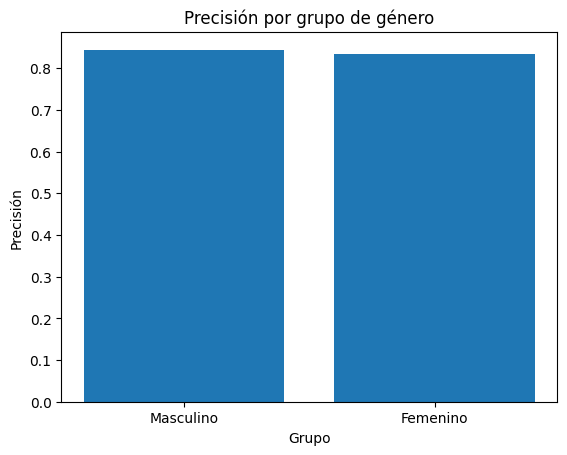

In [ ]:
import matplotlib.pyplot as plt

# Graficar las precisiones por grupo
plt.bar(['Masculino', 'Femenino'], [precision_masculino, precision_femenino])
plt.xlabel('Grupo')
plt.ylabel('Precisión')
plt.title('Precisión por grupo de género')
plt.show()


In [ ]:
import numpy as np

def calcular_proporcion_aprobacion(y_true, y_pred, grupo):
    if grupo == 0:  # Masculino
        indices_grupo = np.where(df['applicant_sex'] == 0)[0]
    elif grupo == 1:  # Femenino
        indices_grupo = np.where(df['applicant_sex'].isin([1, 2]))[0]
    else:
        raise ValueError("El valor de grupo debe ser 0 (masculino) o 1 (femenino)")

    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    aprobados = np.sum(y_pred_grupo == 1)
    proporcion_aprobacion = aprobados / len(y_pred_grupo)
    return proporcion_aprobacion

def calcular_fpr(y_true, y_pred, grupo):
    if grupo == 0:  # Masculino
        indices_grupo = np.where(df['applicant_sex'] == 0)[0]
    elif grupo == 1:  # Femenino
        indices_grupo = np.where(df['applicant_sex'].isin([1, 2]))[0]
    else:
        raise ValueError("El valor de grupo debe ser 0 (masculino) o 1 (femenino)")

    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_positivos = np.sum((y_true_grupo == 0) & (y_pred_grupo == 1))
    negativos_reales = np.sum(y_true_grupo == 0)
    fpr = falsos_positivos / negativos_reales
    return fpr

def calcular_fnr(y_true, y_pred, grupo):
    if grupo == 0:  # Masculino
        indices_grupo = np.where(df['applicant_sex'] == 0)[0]
    elif grupo == 1:  # Femenino
        indices_grupo = np.where(df['applicant_sex'].isin([1, 2]))[0]
    else:
        raise ValueError("El valor de grupo debe ser 0 (masculino) o 1 (femenino)")

    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_negativos = np.sum((y_true_grupo == 1) & (y_pred_grupo == 0))
    positivos_reales = np.sum(y_true_grupo == 1)
    fnr = falsos_negativos / positivos_reales
    return fnr

def calcular_diferencia_aprobacion(y_true, y_pred):
    proporcion_aprobacion_masculino = calcular_proporcion_aprobacion(y_true, y_pred, 0)
    proporcion_aprobacion_femenino = calcular_proporcion_aprobacion(y_true, y_pred, 1)
    diferencia_aprobacion = np.abs(proporcion_aprobacion_masculino - proporcion_aprobacion_femenino)
    return diferencia_aprobacion

def calcular_diferencia_fpr(y_true, y_pred):
    fpr_masculino = calcular_fpr(y_true, y_pred, 0)
    fpr_femenino = calcular_fpr(y_true, y_pred, 1)
    diferencia_fpr = np.abs(fpr_masculino - fpr_femenino)
    return diferencia_fpr

def calcular_diferencia_fnr(y_true, y_pred):
    fnr_masculino = calcular_fnr(y_true, y_pred, 0)
    fnr_femenino = calcular_fnr(y_true, y_pred, 1)
    diferencia_fnr = np.abs(fnr_masculino - fnr_femenino)
    return diferencia_fnr

# Calcular métricas
diferencia_aprobacion = calcular_diferencia_aprobacion(df['action_taken3'], predicciones)
diferencia_fpr = calcular_diferencia_fpr(df['action_taken3'], predicciones)
diferencia_fnr = calcular_diferencia_fnr(df['action_taken3'], predicciones)

print("Diferencia en tasas de aprobación:", diferencia_aprobacion)
print("Diferencia en tasas de FPR:", diferencia_fpr)
print("Diferencia en tasas de FNR:", diferencia_fnr)


Diferencia en tasas de aprobación: 0.02048535497067938
Diferencia en tasas de FPR: 0.014126538054430315
Diferencia en tasas de FNR: 0.0016027387661738668


dIFERENCIA EN TASAS DE APROBACION: Esta  indica la discrepancia en la proporción de solicitudes aprobadas entre los grupos masculino y femeninO.Diferencia en tasas de FPR:discrepancia en la proporción de casos negativos incorrectamente clasificados como positivos entre los grupos masculino y femenino. Diferencia en tasas de FNR: discrepancia en la proporción de casos positivos incorrectamente clasificados como negativos entre los grupos masculino y femenino.

Diferencia en impacto en errores

definir una función de pérdida que cuantifique el costo asociado con los falsos positivos y los falsos negativos. Luego SE calcula la pérdida esperada para cada grupo y encontrar la diferencia entre ellas. permitirán evaluar si los errores del modelo tienen un impacto desigual en hombres y mujeres y en qué medida.

In [ ]:
def calcular_perdida_esperada(y_true, y_pred, grupo):
    if grupo == 0:  # Masculino
        indices_grupo = np.where(df['applicant_sex'] == 0)[0]
    elif grupo == 1:  # Femenino
        indices_grupo = np.where(df['applicant_sex'].isin([1, 2]))[0]
    else:
        raise ValueError("El valor de grupo debe ser 0 (masculino) o 1 (femenino)")

    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]

    # Definir función de pérdida
    # Por ejemplo, si queremos penalizar los falsos negativos más que los falsos positivos
    # Podemos usar una función de pérdida como la pérdida cuadrática
    loss_fn = lambda y_true, y_pred: (y_true - y_pred) ** 2

    perdida_esperada = np.mean(loss_fn(y_true_grupo, y_pred_grupo))
    return perdida_esperada

perdida_esperada_masculino = calcular_perdida_esperada(df['action_taken3'], predicciones, 0)
perdida_esperada_femenino = calcular_perdida_esperada(df['action_taken3'], predicciones, 1)

diferencia_perdida_esperada = np.abs(perdida_esperada_masculino - perdida_esperada_femenino)
print("Diferencia en la pérdida esperada entre grupos masculino y femenino:", diferencia_perdida_esperada)


Diferencia en la pérdida esperada entre grupos masculino y femenino: 0.0006747936416952038


Impacto Desigual - Falsos Positivos (FPR):

In [ ]:
fpr_masculino = calcular_fpr(df['action_taken3'], predicciones, 0)
fpr_femenino = calcular_fpr(df['action_taken3'], predicciones, 1)

diferencia_fpr = np.abs(fpr_masculino - fpr_femenino)
print("Diferencia en la tasa de FPR entre grupos masculino y femenino:", diferencia_fpr)


Diferencia en la tasa de FPR entre grupos masculino y femenino: 0.014126538054430315


Impacto Desigual - Falsos Negativos (FNR):

In [ ]:
fnr_masculino = calcular_fnr(df['action_taken3'], predicciones, 0)
fnr_femenino = calcular_fnr(df['action_taken3'], predicciones, 1)

diferencia_fnr = np.abs(fnr_masculino - fnr_femenino)
print("Diferencia en la tasa de FNR entre grupos masculino y femenino:", diferencia_fnr)


Diferencia en la tasa de FNR entre grupos masculino y femenino: 0.0016027387661738668


In [ ]:
# PARIDAD ESTADISTICACalcula la proporción de resultados positivos para cada nivel de applicant_sex
proporcion_aprobacion_por_sex = {}
for nivel in df['applicant_sex'].unique():
    indices_nivel = df['applicant_sex'] == nivel
    y_true_nivel = df['action_taken3'][indices_nivel]
    y_pred_nivel = predicciones[indices_nivel]
    aprobados = np.sum(y_pred_nivel == 1)
    proporcion_aprobacion_por_sex[nivel] = aprobados / len(y_pred_nivel)

# Calcula el SPD entre cada par de niveles de applicant_sex
spd_por_sex_combinaciones = {}
niveles_sex = df['applicant_sex'].unique()
for i, nivel_1 in enumerate(niveles_sex):
    for j, nivel_2 in enumerate(niveles_sex):
        if i < j:
            spd = abs(proporcion_aprobacion_por_sex[nivel_1] - proporcion_aprobacion_por_sex[nivel_2])
            spd_por_sex_combinaciones[(nivel_1, nivel_2)] = spd

# Imprime los resultados
for combinacion, spd in spd_por_sex_combinaciones.items():
    print(f"SPD entre {combinacion[0]} y {combinacion[1]}: {spd}")


SPD entre 1 y 0: 0.020493657546035826
SPD entre 1 y 2: 0.0028945551031769323
SPD entre 0 y 2: 0.017599102442858894


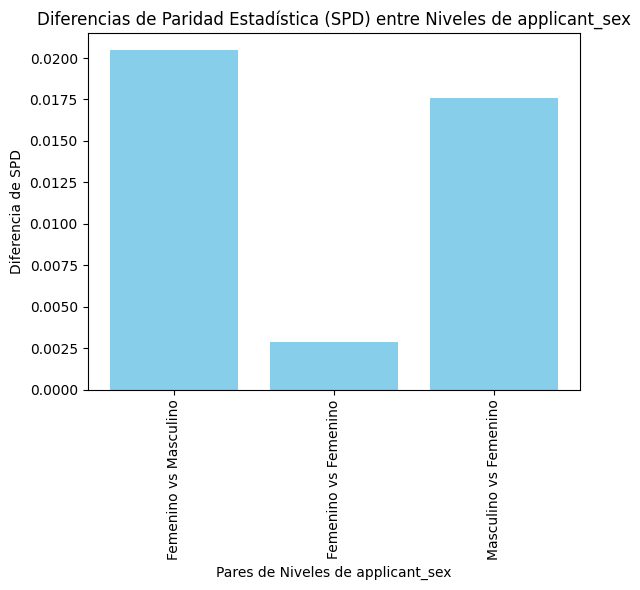

In [ ]:
import matplotlib.pyplot as plt

# Obtener los pares de niveles de applicant_sex y sus respectivos SPD
pares_niveles_sex = list(spd_por_sex_combinaciones.keys())
spd_valores = list(spd_por_sex_combinaciones.values())

# Crear el gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(range(len(spd_valores)), spd_valores, color='skyblue')
plt.xlabel('Pares de Niveles de applicant_sex')
plt.ylabel('Diferencia de SPD')
plt.title('Diferencias de Paridad Estadística (SPD) entre Niveles de applicant_sex')
plt.xticks(range(len(spd_valores)), [f"{par[0]} vs {par[1]}" for par in pares_niveles_sex], rotation=90)

# Cambiar etiquetas de los ejes x
etiquetas_x = [f"{par[0]} vs {par[1]}" for par in pares_niveles_sex]
etiquetas_x = [etiqueta.replace('0', 'Masculino') for etiqueta in etiquetas_x]
etiquetas_x = [etiqueta.replace('1', 'Femenino') for etiqueta in etiquetas_x]
etiquetas_x = [etiqueta.replace('2', 'Femenino') for etiqueta in etiquetas_x]
plt.xticks(range(len(spd_valores)), etiquetas_x, rotation=90)

plt.tight_layout()
plt.show()


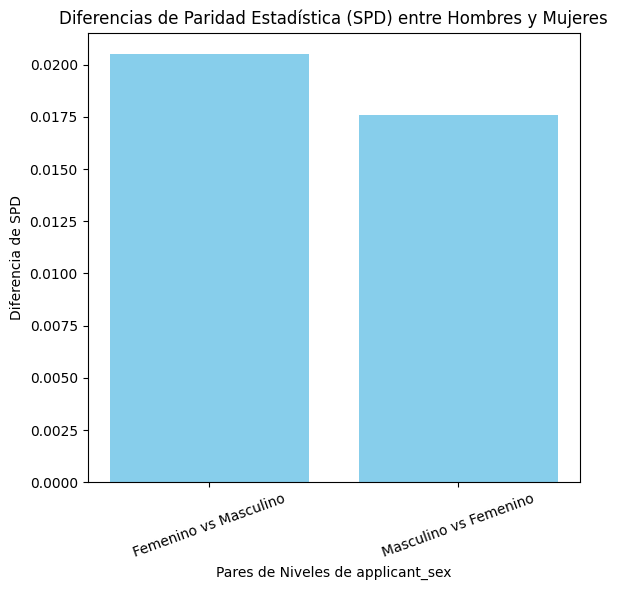

In [ ]:
import matplotlib.pyplot as plt

# Obtener los pares de niveles de applicant_sex y sus respectivos SPD
pares_niveles_sex = list(spd_por_sex_combinaciones.keys())
spd_valores = list(spd_por_sex_combinaciones.values())

# Filtrar pares de niveles que corresponden solo a hombres y mujeres
pares_niveles_sex_filtrados = [par for par in pares_niveles_sex if 0 in par and (1 in par or 2 in par)]
spd_valores_filtrados = [spd_por_sex_combinaciones[par] for par in pares_niveles_sex_filtrados]

# Crear el gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(range(len(spd_valores_filtrados)), spd_valores_filtrados, color='skyblue')
plt.xlabel('Pares de Niveles de applicant_sex')
plt.ylabel('Diferencia de SPD')
plt.title('Diferencias de Paridad Estadística (SPD) entre Hombres y Mujeres')
plt.xticks(range(len(spd_valores_filtrados)), [f"{par[0]} vs {par[1]}" for par in pares_niveles_sex_filtrados], rotation=90)

# Cambiar etiquetas de los ejes x
etiquetas_x = [f"{par[0]} vs {par[1]}" for par in pares_niveles_sex_filtrados]
etiquetas_x = [etiqueta.replace('0', 'Masculino') for etiqueta in etiquetas_x]
etiquetas_x = [etiqueta.replace('1', 'Femenino') for etiqueta in etiquetas_x]
etiquetas_x = [etiqueta.replace('2', 'Femenino') for etiqueta in etiquetas_x]
plt.xticks(range(len(spd_valores_filtrados)), etiquetas_x, rotation=380)

plt.tight_layout()
plt.show()


# METRICAS DE EQUIDAD POR EDAD

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def calcular_metricas_por_grupo_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]

    precision = precision_score(y_true_grupo, y_pred_grupo)
    recall = recall_score(y_true_grupo, y_pred_grupo)
    f1 = f1_score(y_true_grupo, y_pred_grupo)

    return precision, recall, f1

# Definir grupos de edad
grupos_edad = [1, 2, 0, 3, 4, 6, 5, 7]

# Calcular métricas por grupo de edad
metricas_por_grupo_edad = {}
for grupo in grupos_edad:
    precision, recall, f1 = calcular_metricas_por_grupo_edad(df['action_taken3'], predicciones, grupo)
    metricas_por_grupo_edad[grupo] = {'precision': precision, 'recall': recall, 'f1_score': f1}

# Imprimir resultados
for grupo, metricas in metricas_por_grupo_edad.items():
    print(f"Métricas para el grupo de edad {grupo}:")
    print("Precisión:", metricas['precision'])
    print("Recall:", metricas['recall'])
    print("F1-score:", metricas['f1_score'])


Métricas para el grupo de edad 1:
Precisión: 0.8537407929791568
Recall: 0.866207887857838
F1-score: 0.85992915638003
Métricas para el grupo de edad 2:
Precisión: 0.8270172812627569
Recall: 0.870750297282196
F1-score: 0.8483205270467378
Métricas para el grupo de edad 0:
Precisión: 0.8754481909383941
Recall: 0.8708935918776166
F1-score: 0.8731649520286672
Métricas para el grupo de edad 3:
Precisión: 0.8172931678097057
Recall: 0.8661379652970725
F1-score: 0.841006950027693
Métricas para el grupo de edad 4:
Precisión: 0.8169741251773799
Recall: 0.864283889101827
F1-score: 0.8399633705319033
Métricas para el grupo de edad 6:
Precisión: 0.7717661691542289
Recall: 0.8585688871318442
F1-score: 0.8128567418358753
Métricas para el grupo de edad 5:
Precisión: 0.8683429720895147
Recall: 0.8505492340278804
F1-score: 0.8593540038819489
Métricas para el grupo de edad 7:
Precisión: 0.9335335062099086
Recall: 0.9966486959055807
F1-score: 0.9640591966173362


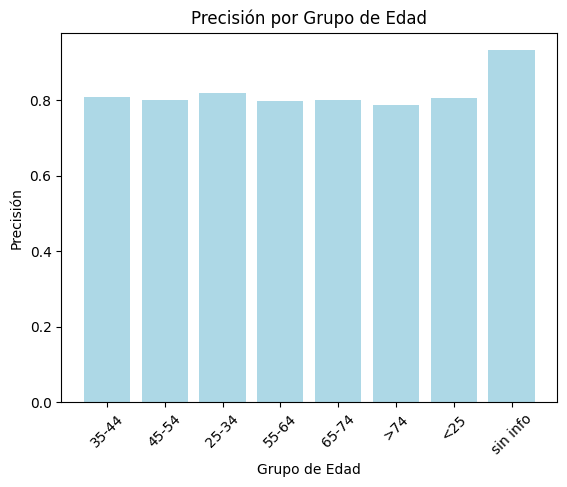

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_precision_por_grupo_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    precision_grupo = np.mean(y_true_grupo == y_pred_grupo)
    return precision_grupo

# Definir grupos de edad y sus etiquetas correspondientes
grupos_edad = [1, 2, 0, 3, 4, 6, 5, 7]
etiquetas_edad = ['35-44', '45-54', '25-34', '55-64', '65-74', '>74', '<25', 'sin info']

# Calcular precisiones por grupo de edad
precision_por_grupo_edad = [calcular_precision_por_grupo_edad(df['action_taken3'], predicciones, grupo) for grupo in grupos_edad]

# Graficar las precisiones por grupo de edad
plt.bar(etiquetas_edad, precision_por_grupo_edad, color='lightblue')  # Cambio de color a azul claro
plt.xlabel('Grupo de Edad')
plt.ylabel('Precisión')
plt.title('Precisión por Grupo de Edad')
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x para mejorar la legibilidad
plt.show()


In [ ]:
import numpy as np

# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

def calcular_proporcion_aprobacion_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    aprobados = np.sum(y_pred_grupo == 1)
    proporcion_aprobacion = aprobados / len(y_pred_grupo)
    return proporcion_aprobacion

def calcular_fpr_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_positivos = np.sum((y_true_grupo == 0) & (y_pred_grupo == 1))
    negativos_reales = np.sum(y_true_grupo == 0)
    fpr = falsos_positivos / negativos_reales
    return fpr

def calcular_fnr_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_negativos = np.sum((y_true_grupo == 1) & (y_pred_grupo == 0))
    positivos_reales = np.sum(y_true_grupo == 1)
    fnr = falsos_negativos / positivos_reales
    return fnr

def calcular_diferencia_aprobacion_por_edad(y_true, y_pred):
    proporcion_aprobacion_por_edad = {}
    for grupo, etiqueta in grupos_edad.items():
        proporcion_aprobacion_por_edad[etiqueta] = calcular_proporcion_aprobacion_por_edad(y_true, y_pred, grupo)
    diferencia_aprobacion = max(proporcion_aprobacion_por_edad.values()) - min(proporcion_aprobacion_por_edad.values())
    return diferencia_aprobacion

def calcular_diferencia_fpr_por_edad(y_true, y_pred):
    fpr_por_edad = {}
    for grupo, etiqueta in grupos_edad.items():
        fpr_por_edad[etiqueta] = calcular_fpr_por_edad(y_true, y_pred, grupo)
    diferencia_fpr = max(fpr_por_edad.values()) - min(fpr_por_edad.values())
    return diferencia_fpr

def calcular_diferencia_fnr_por_edad(y_true, y_pred):
    fnr_por_edad = {}
    for grupo, etiqueta in grupos_edad.items():
        fnr_por_edad[etiqueta] = calcular_fnr_por_edad(y_true, y_pred, grupo)
    diferencia_fnr = max(fnr_por_edad.values()) - min(fnr_por_edad.values())
    return diferencia_fnr

# Calcular métricas
diferencia_aprobacion_por_edad = calcular_diferencia_aprobacion_por_edad(df['action_taken3'], predicciones)
diferencia_fpr_por_edad = calcular_diferencia_fpr_por_edad(df['action_taken3'], predicciones)
diferencia_fnr_por_edad = calcular_diferencia_fnr_por_edad(df['action_taken3'], predicciones)

print("Diferencia en tasas de aprobación por edad:", diferencia_aprobacion_por_edad)
print("Diferencia en tasas de FPR por edad:", diferencia_fpr_por_edad)
print("Diferencia en tasas de FNR por edad:", diferencia_fnr_por_edad)



Diferencia en tasas de aprobación por edad: 0.36961221345192785
Diferencia en tasas de FPR por edad: 0.41079694384027665
Diferencia en tasas de FNR por edad: 0.14609946187770023


Difrencia en impacto de errores

In [ ]:
def calcular_perdida_esperada_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]

    # Definir función de pérdida
    # Por ejemplo, si queremos penalizar los falsos negativos más que los falsos positivos
    # Podemos usar una función de pérdida como la pérdida cuadrática
    loss_fn = lambda y_true, y_pred: (y_true - y_pred) ** 2

    perdida_esperada = np.mean(loss_fn(y_true_grupo, y_pred_grupo))
    return perdida_esperada

# Calcular la pérdida esperada para cada grupo de edad
perdida_esperada_por_edad = {}
for grupo in df['applicant_age'].unique():
    perdida_esperada_por_edad[grupo] = calcular_perdida_esperada_por_edad(df['action_taken3'], predicciones, grupo)

# Calcular la diferencia en la pérdida esperada
diferencia_perdida_esperada_por_edad = max(perdida_esperada_por_edad.values()) - min(perdida_esperada_por_edad.values())

print("Diferencia en la pérdida esperada por edad:", diferencia_perdida_esperada_por_edad)


Diferencia en la pérdida esperada por edad: 0.1456789546168869


Impacto Desigual - Falsos Positivos (FPR):

In [ ]:
def calcular_fpr_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_positivos = np.sum((y_true_grupo == 0) & (y_pred_grupo == 1))
    negativos_reales = np.sum(y_true_grupo == 0)
    fpr = falsos_positivos / negativos_reales
    return fpr

# Calcular FPR para cada grupo de edad
fpr_por_edad = {}
for grupo in df['applicant_age'].unique():
    fpr_por_edad[grupo] = calcular_fpr_por_edad(df['action_taken3'], predicciones, grupo)

# Calcular la diferencia en la tasa de FPR entre grupos de edad
diferencia_fpr_por_edad = max(fpr_por_edad.values()) - min(fpr_por_edad.values())

print("Diferencia en la tasa de FPR entre grupos de edad:", diferencia_fpr_por_edad)


Diferencia en la tasa de FPR entre grupos de edad: 0.41079694384027665


Impacto Desigual - Falsos Negativos (FNR):

In [ ]:
def calcular_fnr_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_negativos = np.sum((y_true_grupo == 1) & (y_pred_grupo == 0))
    positivos_reales = np.sum(y_true_grupo == 1)
    fnr = falsos_negativos / positivos_reales
    return fnr

# Calcular FNR para cada grupo de edad
fnr_por_edad = {}
for grupo in df['applicant_age'].unique():
    fnr_por_edad[grupo] = calcular_fnr_por_edad(df['action_taken3'], predicciones, grupo)

# Calcular la diferencia en la tasa de FNR entre grupos de edad
diferencia_fnr_por_edad = max(fnr_por_edad.values()) - min(fnr_por_edad.values())

print("Diferencia en la tasa de FNR entre grupos de edad:", diferencia_fnr_por_edad)


Diferencia en la tasa de FNR entre grupos de edad: 0.14609946187770023


In [ ]:
import pandas as pd

# Supongamos que ya tienes cargados tus datos en un DataFrame llamado df
# Aquí definiré un DataFrame de ejemplo para ilustrar el proceso
data = {
    'grupo_edad': ['<25', '25-34', '35-44', '45-54', '<25', '35-44', '25-34'],  # Ejemplo de grupos de edad
    'aprobacion': [1, 0, 1, 1, 0, 1, 1]                                           # Ejemplo de aprobaciones (1) y rechazos (0)
}

df = pd.DataFrame(data)

# Calcular la proporción de aprobaciones por grupo de edad
proporcion_aprobacion_por_edad = df.groupby('grupo_edad')['aprobacion'].mean()

print(proporcion_aprobacion_por_edad)


grupo_edad
25-34    0.5
35-44    1.0
45-54    1.0
<25      0.5
Name: aprobacion, dtype: float64


In [ ]:
# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Calcular el SPD para todas las combinaciones de pares de grupos de edad
for grupo_1 in grupos_edad.values():
    for grupo_2 in grupos_edad.values():
        if grupo_1 != grupo_2:
            spd_por_edad = abs(proporcion_aprobacion_por_edad[grupo_1] - proporcion_aprobacion_por_edad[grupo_2])
            print("Diferencia de paridad estadística (SPD) entre los grupos de edad", grupo_1, "y", grupo_2, ":", spd_por_edad)



Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y 25-34 : 0.050000000000000044
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y 35-44 : 0.050000000000000044
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y 45-54 : 0.09999999999999998
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y 55-64 : 0.15000000000000002
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y 65-74 : 0.19999999999999996
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y >74 : 0.25
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y sin info : 0.3
Diferencia de paridad estadística (SPD) entre los grupos de edad 25-34 y <25 : 0.050000000000000044
Diferencia de paridad estadística (SPD) entre los grupos de edad 25-34 y 35-44 : 0.10000000000000009
Diferencia de paridad estadística (SPD) entre los grupos de edad 25-34 y 45-54 : 0.15000000000000002
Diferencia de paridad estadística

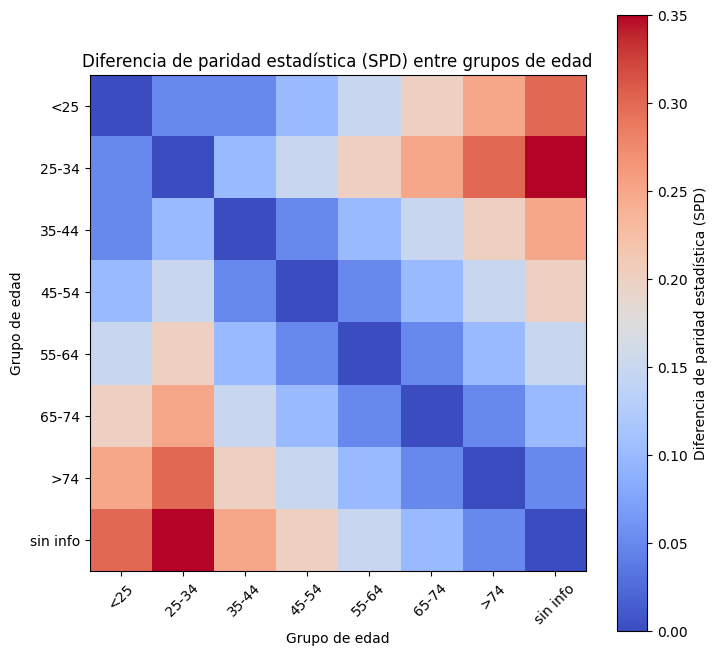

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Calcular el SPD para todas las combinaciones de pares de grupos de edad
spd_por_edad = np.zeros((len(grupos_edad), len(grupos_edad)))
for i, grupo_1 in enumerate(grupos_edad.values()):
    for j, grupo_2 in enumerate(grupos_edad.values()):
        if grupo_1 != grupo_2:
            spd_por_edad[i, j] = abs(proporcion_aprobacion_por_edad[grupo_1] - proporcion_aprobacion_por_edad[grupo_2])

# Crear un mapa de calor para visualizar el SPD
plt.figure(figsize=(8, 8))
plt.imshow(spd_por_edad, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Diferencia de paridad estadística (SPD)')
plt.xticks(range(len(grupos_edad)), list(grupos_edad.values()), rotation=45)
plt.yticks(range(len(grupos_edad)), list(grupos_edad.values()))
plt.title('Diferencia de paridad estadística (SPD) entre grupos de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Grupo de edad')
plt.show()


Impacto Dispar EDAD

In [ ]:
# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Definir los grupos de edad que deseas comparar
grupo_referencia = '<25'  # Por ejemplo, el grupo <25
grupo_comparacion = '35-44'  # Por ejemplo, el grupo 35-44

# Calcular el Impacto Dispar entre los grupos de edad para la proporción de aprobación
impacto_dispar_proporcion_aprobacion = proporcion_aprobacion_por_edad[grupo_referencia] - proporcion_aprobacion_por_edad[grupo_comparacion]

print("Impacto Dispar entre los grupos de edad", grupo_referencia, "y", grupo_comparacion, "para la proporción de aprobación:", impacto_dispar_proporcion_aprobacion)



Impacto Dispar entre los grupos de edad <25 y 35-44 para la proporción de aprobación: 0.050000000000000044


In [ ]:
# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Definir el grupo de referencia
grupo_referencia = '<25'  # Por ejemplo, el grupo <25

# Calcular el Impacto Dispar entre el grupo de referencia y cada uno de los otros grupos de edad
impacto_dispar_por_grupo = {}
for grupo, proporción in proporcion_aprobacion_por_edad.items():
    if grupo != grupo_referencia:
        impacto_dispar_por_grupo[grupo] = proporcion_aprobacion_por_edad[grupo_referencia] - proporción

# Imprimir el Impacto Dispar para cada grupo de edad
for grupo, impacto_dispar in impacto_dispar_por_grupo.items():
    print("Impacto Dispar entre los grupos de edad", grupo_referencia, "y", grupo, ":", impacto_dispar)


Impacto Dispar entre los grupos de edad <25 y 25-34 : -0.050000000000000044
Impacto Dispar entre los grupos de edad <25 y 35-44 : 0.050000000000000044
Impacto Dispar entre los grupos de edad <25 y 45-54 : 0.09999999999999998
Impacto Dispar entre los grupos de edad <25 y 55-64 : 0.15000000000000002
Impacto Dispar entre los grupos de edad <25 y 65-74 : 0.19999999999999996
Impacto Dispar entre los grupos de edad <25 y >74 : 0.25
Impacto Dispar entre los grupos de edad <25 y sin info : 0.3


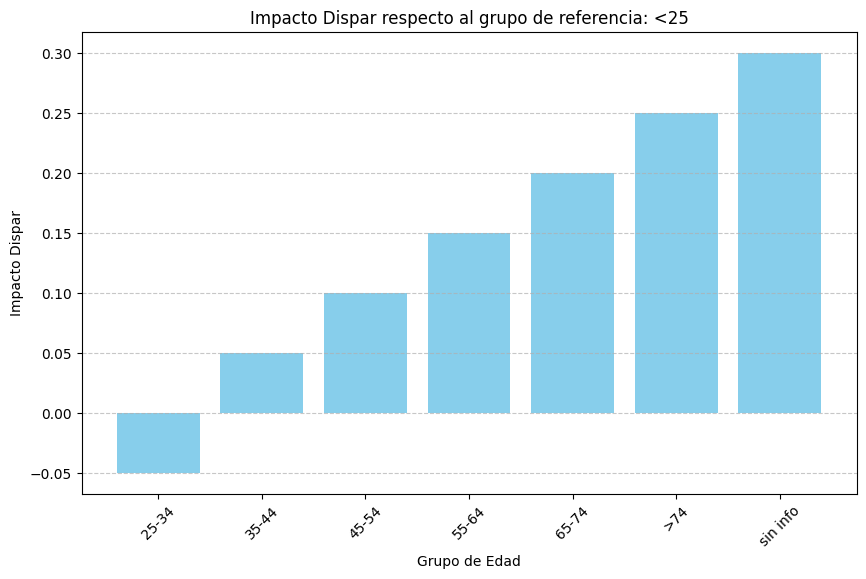

In [ ]:
import matplotlib.pyplot as plt

# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Definir el grupo de referencia
grupo_referencia = '<25'  # Por ejemplo, el grupo <25

# Calcular el Impacto Dispar entre el grupo de referencia y cada uno de los otros grupos de edad
impacto_dispar_por_grupo = {}
for grupo, proporción in proporcion_aprobacion_por_edad.items():
    if grupo != grupo_referencia:
        impacto_dispar_por_grupo[grupo] = proporcion_aprobacion_por_edad[grupo_referencia] - proporción

# Mostrar el Impacto Dispar en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(impacto_dispar_por_grupo.keys(), impacto_dispar_por_grupo.values(), color='skyblue')
plt.xlabel('Grupo de Edad')
plt.ylabel('Impacto Dispar')
plt.title(f'Impacto Dispar respecto al grupo de referencia: {grupo_referencia}')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Fairlearn: REESTRICCION DE EQUIDAD

In [ ]:
#https://www.modeldifferently.com/2023/10/como-evitar-sesgos-en-un-algoritmo/#la-%C3%A9tica-en-machine-learning-qu%C3%A9-entendemos-por-%C3%A9tica

In [ ]:
pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
from fairlearn.reductions import GridSearch
from fairlearn.reductions import DemographicParity
from fairlearn.metrics import MetricFrame
from fairlearn.reductions import GridSearch, DemographicParity
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from fairlearn.metrics import demographic_parity_difference
from sklearn.impute import SimpleImputer

In [ ]:
from fairlearn.reductions import GridSearch
from fairlearn.reductions import DemographicParity
from fairlearn.metrics import MetricFrame

In [ ]:
#Modelo con reestriccion de pARIDAD ESTADISTICA
from fairlearn.reductions import DemographicParity, GridSearch
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Creamos el modelo LGBMClassifier
lgbm_model = LGBMClassifier()

# Creamos el pipeline con el modelo LGBM y el escalador
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Puedes agregar un escalador si es necesario
    ('lgbm', lgbm_model)
])

# Creamos el mitigador de sesgo para el modelo
sweep = GridSearch(
    pipeline,  # Usamos nuestro pipeline con el modelo LGBM
    constraints=DemographicParity(),  # La métrica que queremos optimizar
    grid_size=40,
    sample_weight_name='lgbm__sample_weight'  # Especificamos el nombre del parámetro de peso de muestra
)

# Entrenamos el mitigador de sesgo
sweep.fit(X_train, y_train, sensitive_features=X_train[['applicant_sex']])

# Seleccionamos el mejor modelo según la métrica de equidad
sweep_preds = [predictor.predict(X_test) for predictor in sweep.predictors_]
sweep_scores = [accuracy_score(y_test, preds) for preds in sweep_preds]
best_model_index = np.argmax(sweep_scores)
best_model = sweep.predictors_[best_model_index]

# Evaluamos el modelo seleccionado
predictions = best_model.predict(X_test)





[LightGBM] [Info] Number of positive: 354230, number of negative: 445770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.605838 -> initscore=0.429853
[LightGBM] [Info] Start training from score 0.429853
[LightGBM] [Info] Number of positive: 522917, number of negative: 277083
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] 

In [ ]:
# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.806605


In [ ]:
# Calcular la precisión por grupo de sexo y raza
sensitive_features_test = X_test[['applicant_sex']]
metrics = MetricFrame(metrics={'precision': precision_score, 'recall': recall_score},
                      y_true=y_test,
                      y_pred=predictions,
                      sensitive_features=sensitive_features_test)

# Obtener los valores de las métricas por grupo
group_metrics = metrics.by_group

# Imprimir las métricas por grupo de una manera controlada
print("Precision and recall by applicant_sex:")
for group, metrics in group_metrics.iterrows():
    print(f"Applicant_sex: {group}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print()


Precision and recall by applicant_sex:
Applicant_sex: 0
Precision: 0.8443543185718815
Recall: 0.8711820437626889

Applicant_sex: 1
Precision: 0.8329454711384896
Recall: 0.8656312981624185

Applicant_sex: 2
Precision: 0.819672131147541
Recall: 0.9174311926605505



In [ ]:
#Modelo con reestriccion Igualdad FALSOS POSITIVOS
from fairlearn.reductions import ErrorRateParity, GridSearch
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Creamos un nuevo modelo LGBMClassifier para el ajuste de equidad en falsos positivos
lgbm_model_eq_fp = LGBMClassifier()

# Creamos un nuevo pipeline con el modelo LGBM y el escalador para el ajuste de equidad en falsos positivos
pipeline_eq_fp = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', lgbm_model_eq_fp)
])

# Creamos el mitigador de sesgo para el ajuste de equidad en falsos positivos
sweep_eq_fp = GridSearch(
    pipeline_eq_fp,
    constraints=ErrorRateParity(),
    grid_size=40,
    sample_weight_name='lgbm__sample_weight'
)

# Entrenamos el mitigador de sesgo para el ajuste de equidad en falsos positivos
sweep_eq_fp.fit(X_train, y_train, sensitive_features=X_train[['applicant_sex']])

# Seleccionamos el mejor modelo según la métrica de equidad en falsos positivos
sweep_preds_eq_fp = [predictor.predict(X_test) for predictor in sweep_eq_fp.predictors_]
sweep_scores_eq_fp = [accuracy_score(y_test, preds) for preds in sweep_preds_eq_fp]
best_model_index_eq_fp = np.argmax(sweep_scores_eq_fp)
best_model_eq_fp = sweep_eq_fp.predictors_[best_model_index_eq_fp]

# Evaluamos el modelo seleccionado para el ajuste de equidad en falsos positivos
predictions_eq_fp = best_model_eq_fp.predict(X_test)


[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.637110 -> initscore=0.562842
[LightGBM] [Info] Start training from score 0.562842
[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] 

In [ ]:
from sklearn.metrics import accuracy_score

# Calcular la precisión para el modelo con equidad en falsos positivos
accuracy_eq_fp = accuracy_score(y_test, predictions_eq_fp)
print(f"Accuracy (with fairness constraint on false positives): {accuracy_eq_fp}")


Accuracy (with fairness constraint on false positives): 0.80694


In [ ]:
from fairlearn.metrics import MetricFrame

# Calcular la precisión por grupo de sexo y raza para el modelo con equidad en falsos positivos
sensitive_features_test = X_test[['applicant_sex']]  # Puedes modificar esto según las características sensibles de interés
metrics_eq_fp = MetricFrame(metrics={'precision': precision_score, 'recall': recall_score},
                            y_true=y_test,
                            y_pred=predictions_eq_fp,  # Aquí pasas las predicciones del modelo con equidad en falsos positivos
                            sensitive_features=sensitive_features_test)

# Obtener los valores de las métricas por grupo
group_metrics_eq_fp = metrics_eq_fp.by_group

# Imprimir las métricas por grupo de una manera controlada
print("Precision and recall by applicant_sex:")
for group, metrics in group_metrics_eq_fp.iterrows():
    print(f"Applicant_sex: {group}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print()


Precision and recall by applicant_sex:
Applicant_sex: 0
Precision: 0.8445501257242812
Recall: 0.8713173922851343

Applicant_sex: 1
Precision: 0.8332497034942067
Recall: 0.8662240663900415

Applicant_sex: 2
Precision: 0.819672131147541
Recall: 0.9174311926605505



In [ ]:
#Para EDAD
# Creamos un nuevo modelo LGBMClassifier para el ajuste de equidad en falsos positivos
lgbm_model_eq_fp = LGBMClassifier()

# Creamos un nuevo pipeline con el modelo LGBM y el escalador para el ajuste de equidad en falsos positivos
pipeline_eq_fp = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', lgbm_model_eq_fp)
])

# Creamos el mitigador de sesgo para el ajuste de equidad en falsos positivos
sweep_eq_fp_1 = GridSearch(
    pipeline_eq_fp,
    constraints=ErrorRateParity(),
    grid_size=40,
    sample_weight_name='lgbm__sample_weight'
)

# Entrenamos el mitigador de sesgo para el ajuste de equidad en falsos positivos
sweep_eq_fp_1.fit(X_train, y_train, sensitive_features=X_train[['applicant_age']])

# Seleccionamos el mejor modelo según la métrica de equidad en falsos positivos
sweep_preds_eq_fp_1 = [predictor.predict(X_test) for predictor in sweep_eq_fp_1.predictors_]
sweep_scores_eq_fp_1 = [accuracy_score(y_test, preds) for preds in sweep_preds_eq_fp_1]
best_model_index_eq_fp_1 = np.argmax(sweep_scores_eq_fp_1)
best_model_eq_fp_1 = sweep_eq_fp_1.predictors_[best_model_index_eq_fp_1]

# Evaluamos el modelo seleccionado para el ajuste de equidad en falsos positivos
predictions_eq_fp_1 = best_model_eq_fp_1.predict(X_test)



[LightGBM] [Info] Number of positive: 458395, number of negative: 341605
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.531840 -> initscore=0.127534
[LightGBM] [Info] Start training from score 0.127534
[LightGBM] [Info] Number of positive: 391325, number of negative: 408675
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] 

In [ ]:
from sklearn.metrics import accuracy_score

# Calcular la precisión para el modelo con equidad en falsos positivos
accuracy_eq_fp = accuracy_score(y_test, predictions_eq_fp_1)
print(f"Accuracy (with fairness constraint on false positives): {accuracy_eq_fp}")


Accuracy (with fairness constraint on false positives): 0.782865


In [ ]:
from sklearn.metrics import f1_score

# Calcular el F1 Score del modelo ajustado para el ajuste de equidad en falsos positivos
f1_score_eq_fp_1 = f1_score(y_test, predictions_eq_fp_1)

# Imprimir el F1 Score
print("F1 Score Model with Error Rate Parity Constraint on False Positives:", f1_score_eq_fp_1)


F1 Score Model with Error Rate Parity Constraint on False Positives: 0.8362030272284604


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular la precisión para el modelo con equidad en falsos positivos
accuracy_eq_fp = accuracy_score(y_test, predictions_eq_fp_1)
precision_eq_fp = precision_score(y_test, predictions_eq_fp_1, average='weighted')
recall_eq_fp = recall_score(y_test, predictions_eq_fp_1, average='weighted')
f1_eq_fp = f1_score(y_test, predictions_eq_fp_1, average='weighted')

# Mostrar los resultados
print(f"Accuracy (with fairness constraint on false positives): {accuracy_eq_fp:.4f}")
print(f"Precision (with fairness constraint on false positives): {precision_eq_fp:.4f}")
print(f"Recall (with fairness constraint on false positives): {recall_eq_fp:.4f}")
print(f"F1 Score (with fairness constraint on false positives): {f1_eq_fp:.4f}")


Accuracy (with fairness constraint on false positives): 0.7829
Precision (with fairness constraint on false positives): 0.7807
Recall (with fairness constraint on false positives): 0.7829
F1 Score (with fairness constraint on false positives): 0.7816


In [ ]:
from fairlearn.reductions import GridSearch, TruePositiveRateParity
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


In [ ]:
# Crear un nuevo modelo LGBMClassifier para el ajuste de equidad en verdaderos positivos
lgbm_model_eq_fn = LGBMClassifier()

# Crear un nuevo pipeline con el modelo LGBM y el escalador para el ajuste de equidad en verdaderos positivos
pipeline_eq_fn = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', lgbm_model_eq_fn)
])

# Crear el mitigador de sesgo para el ajuste de equidad en verdaderos positivos
sweep_eq_fn_1 = GridSearch(
    pipeline_eq_fn,
    constraints=TruePositiveRateParity(),
    grid_size=40,
    sample_weight_name='lgbm__sample_weight'
)

# Entrenar el mitigador de sesgo para el ajuste de equidad en verdaderos positivos
sweep_eq_fn_1.fit(X_train, y_train, sensitive_features=X_train[['applicant_age']])

# Seleccionar el mejor modelo según la métrica de equidad en verdaderos positivos
sweep_preds_eq_fn_1 = [predictor.predict(X_test) for predictor in sweep_eq_fn_1.predictors_]
sweep_scores_eq_fn_1 = [accuracy_score(y_test, preds) for preds in sweep_preds_eq_fn_1]
best_model_index_eq_fn_1 = np.argmax(sweep_scores_eq_fn_1)
best_model_eq_fn_1 = sweep_eq_fn_1.predictors_[best_model_index_eq_fn_1]

# Evaluar el modelo seleccionado para el ajuste de equidad en verdaderos positivos
predictions_eq_fn_1 = best_model_eq_fn_1.predict(X_test)

# Calcular métricas adicionales
accuracy_eq_fn = accuracy_score(y_test, predictions_eq_fn_1)
precision_eq_fn = precision_score(y_test, predictions_eq_fn_1, average='weighted')
recall_eq_fn = recall_score(y_test, predictions_eq_fn_1, average='weighted')
f1_eq_fn = f1_score(y_test, predictions_eq_fn_1, average='weighted')

# Imprimir resultados
print(f"Accuracy (with fairness constraint on false negatives): {accuracy_eq_fn}")
print(f"Precision (with fairness constraint on false negatives): {precision_eq_fn}")
print(f"Recall (with fairness constraint on false negatives): {recall_eq_fn}")
print(f"F1 Score (with fairness constraint on false negatives): {f1_eq_fn}")


[LightGBM] [Info] Number of positive: 125837, number of negative: 674163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550654 -> initscore=0.203314
[LightGBM] [Info] Start training from score 0.203314
[LightGBM] [Info] Number of positive: 236678, number of negative: 563322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] 

In [ ]:
# Calcular métricas adicionales
accuracy_eq_fn = accuracy_score(y_test, predictions_eq_fn_1)
precision_eq_fn = precision_score(y_test, predictions_eq_fn_1, average='weighted')
recall_eq_fn = recall_score(y_test, predictions_eq_fn_1, average='weighted')
f1_eq_fn = f1_score(y_test, predictions_eq_fn_1, average='weighted')

# Imprimir resultados
print(f"Accuracy (with fairness constraint on false negatives): {accuracy_eq_fn}")
print(f"Precision (with fairness constraint on false negatives): {precision_eq_fn}")
print(f"Recall (with fairness constraint on false negatives): {recall_eq_fn}")
print(f"F1 Score (with fairness constraint on false negatives): {f1_eq_fn}")


Accuracy (with fairness constraint on false negatives): 0.782715
Precision (with fairness constraint on false negatives): 0.7808650058133211
Recall (with fairness constraint on false negatives): 0.782715
F1 Score (with fairness constraint on false negatives): 0.781633080467467


# Fairlearn: Exponentiated Gradient

In [ ]:
from fairlearn.reductions import ExponentiatedGradient
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame

# Modifica el nombre del parámetro de peso de muestra en tu modelo LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.sample_weight = 'lgbm__sample_weight'

# Crear el mitigador de sesgo para el modelo que ya tenemos
expgrad = ExponentiatedGradient(
    lgbm_model,  # Utiliza tu modelo LightGBM ya entrenado
    constraints=DemographicParity(),  # Puedes cambiar la métrica de equidad si lo deseas
    max_iter=5  # Especifica el número máximo de iteraciones
)

# Entrenar el mitigador de sesgo
expgrad.fit(X_train, y_train, sensitive_features=X_train[['applicant_sex']])  # Asegúrate de proporcionar las características sensibles correctas



[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.654212 -> initscore=0.637608
[LightGBM] [Info] Start training from score 0.637608
[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] 

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7ae91a4f8a30>,
                      estimator=LGBMClassifier(), max_iter=5,
                      nu=0.00022083014448839435)

In [ ]:
predictions_expgrad = expgrad.predict(X_test)


In [ ]:
accuracy_expgrad = accuracy_score(y_test, predictions_expgrad)


In [ ]:
print("Accuracy Original Model:", accuracy_lgbm)
print("Accuracy Model with Exponentiated Gradient:", accuracy_expgrad)


Accuracy Original Model: 0.807315
Accuracy Model with Exponentiated Gradient: 0.80727


In [ ]:
#Para Edad optimizando falsos positivos
from fairlearn.reductions import ExponentiatedGradient, ErrorRateParity
from sklearn.metrics import accuracy_score

# Modificar el nombre del parámetro de peso de muestra en tu modelo LightGBM
lgbm_model_expgrad = LGBMClassifier()
lgbm_model_expgrad.sample_weight = 'lgbm__sample_weight'

# Crear el mitigador de sesgo para el modelo existente con ExponentiatedGradient
expgrad = ExponentiatedGradient(
    lgbm_model_expgrad,  # Utiliza tu modelo LightGBM ya entrenado
    constraints=ErrorRateParity(),  # Restricción de igualdad en falsos positivos
    max_iter=5  # Número máximo de iteraciones
)

# Entrenar el mitigador de sesgo con ExponentiatedGradient
expgrad.fit(X_train, y_train, sensitive_features=X_train[['applicant_age']])

# Predecir utilizando el modelo ajustado con ExponentiatedGradient
predictions_expgrad = expgrad.predict(X_test)

# Calcular la precisión del modelo ajustado con ExponentiatedGradient
accuracy_expgrad = accuracy_score(y_test, predictions_expgrad)

# Imprimir los resultados
print("Accuracy Original Model:", accuracy_lgbm)
print("Accuracy Model with Exponentiated Gradient (with fairness constraint on false positives):", accuracy_expgrad)


[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.654212 -> initscore=0.637608
[LightGBM] [Info] Start training from score 0.637608
[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] 

In [ ]:
from sklearn.metrics import f1_score

# Calcular el F1 Score del modelo ajustado con ExponentiatedGradient
f1_score_expgrad = f1_score(y_test, predictions_expgrad)

# Imprimir los resultados
print("Accuracy Original Model:", accuracy_lgbm)
print("Accuracy Model with Exponentiated Gradient (with fairness constraint on false positives):", accuracy_expgrad)
print("F1 Score Model with Exponentiated Gradient (with fairness constraint on false positives):", f1_score_expgrad)


Accuracy Original Model: 0.807315
Accuracy Model with Exponentiated Gradient (with fairness constraint on false positives): 0.7976
F1 Score Model with Exponentiated Gradient (with fairness constraint on false positives): 0.8473052085219386


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular las métricas de desempeño para el modelo ajustado con ExponentiatedGradient
accuracy_expgrad = accuracy_score(y_test, predictions_expgrad)
precision_expgrad = precision_score(y_test, predictions_expgrad, average='weighted')
recall_expgrad = recall_score(y_test, predictions_expgrad, average='weighted')
f1_score_expgrad = f1_score(y_test, predictions_expgrad, average='weighted')

# Imprimir los resultados
print("Accuracy Original Model:", accuracy_lgbm)
print("Accuracy Model with Exponentiated Gradient (with fairness constraint on false positives):", accuracy_expgrad)
print("Precision Model with Exponentiated Gradient (with fairness constraint on false positives):", precision_expgrad)
print("Recall Model with Exponentiated Gradient (with fairness constraint on false positives):", recall_expgrad)
print("F1 Score Model with Exponentiated Gradient (with fairness constraint on false positives):", f1_score_expgrad)


Accuracy Original Model: 0.807315
Accuracy Model with Exponentiated Gradient (with fairness constraint on false positives): 0.7976
Precision Model with Exponentiated Gradient (with fairness constraint on false positives): 0.7956681691181744
Recall Model with Exponentiated Gradient (with fairness constraint on false positives): 0.7976
F1 Score Model with Exponentiated Gradient (with fairness constraint on false positives): 0.796414998587011


In [ ]:
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame

# Modifica el nombre del parámetro de peso de muestra en tu modelo LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.sample_weight = 'lgbm__sample_weight'

# Crear el mitigador de sesgo para el modelo que ya tenemos
expgrad = ExponentiatedGradient(
    lgbm_model,  # Utiliza tu modelo LightGBM ya entrenado
    constraints=EqualizedOdds(),  # Usamos EqualizedOdds como la restricción
    max_iter=5  # Especifica el número máximo de iteraciones
)

# Entrenar el mitigador de sesgo
expgrad.fit(X_train, y_train, sensitive_features=X_train[['applicant_age']])  # Asegúrate de proporcionar las características sensibles correctas



[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.654212 -> initscore=0.637608
[LightGBM] [Info] Start training from score 0.637608
[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] 

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x7ae91d0b2020>,
                      estimator=LGBMClassifier(), max_iter=5,
                      nu=0.00022083014448839435)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Realizar predicciones en el conjunto de datos de prueba
y_pred = expgrad.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.803155
Precision: 0.8381422209749722
Recall: 0.86672165200391
F1 Score: 0.8521923913002669
